# BCI homework

# Brain-Computer Interfaces (Fall 2017, ELE 594)
# Instructor: Yalda Shahriari

# 1st homework, 9/23/17 (The homework, is due by Oct 4, 11:55 pm).

# Instruction: 
Load the “sampleEEGdata” into your Matlab workspace. 
This EEG dataset contains 64 channels (EEG.nbchan), 640 time points (EEG.pnts), and 99 trials (EEG.trials). 
The time points in ms has been saved in EEG.times where you can see each trial has been started 
from -1000 ms and ends at ~1500 ms. 
Use the topoplot.m function for plotting the head plots. 
Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis. 

In [1]:
# Here are the functions, 
# which reconstructs the dictionaries just use this loadmat instead of scipy.io's loadmat:

import scipy.io as spio
import numpy as np

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, spio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [2]:
# Load the “sampleEEGdata” into your Matlab workspace. 
data = loadmat(filename='sampleEEGdata')
data['EEG'].keys()

dict_keys(['etc', 'urevent', 'comments', 'icaact', 'xmin', 'epoch', 'spedata', 'setname', 'icachansind', 'epochdescription', 'xmax', 'chaninfo', 'history', 'times', 'eventdescription', 'trials', 'data', 'ref', 'stats', 'session', 'specdata', 'filepath', 'event', 'icaweights', 'icawinv', 'saved', 'group', 'srate', 'specicaact', 'subject', 'reject', 'icasphere', 'chanlocs', 'condition', 'icasplinefile', 'pnts', 'dipfit', 'filename', 'urchanlocs', 'nbchan', 'splinefile'])

In [3]:
# This EEG dataset contains 64 channels (EEG.nbchan), 640 time points (EEG.pnts), and 99 trials (EEG.trials). 
eeg = data['EEG']
eeg['nbchan'], eeg['pnts'], eeg['trials']

(64, 640, 99)

In [4]:
# The time points in ms has been saved in EEG.times where you can see each trial has been started 
# from -1000 ms and ends at ~1500 ms.
eeg['times'].shape
t_start = -1000 # ms: milisecond
t_end = 1500 # ms
t_duration = t_end - t_start
sfreq = (eeg['times'].shape[0]/t_duration) * 1000
sfreq, eeg['srate']

(256.0, 256)

In [66]:
# Use the topoplot.m function for plotting the head plots.
eeg.keys()
# inst = eeg['epoch'][0]
# eeg['urchanlocs'] # empty array
# eeg['splinefile'] # empty array
# len(eeg['epoch']) # number of trials
# _todict(eeg['epoch'][98]) # events
# eeg['dipfit'] # empty array
# eeg['etc'].keys() # ICA info
# eeg['etc']['icasphere_beforerms'].shape # ICA
# len(eeg['chanlocs']) # number of channels for channel locations
# _todict(eeg['chanlocs'][0])
# eeg['filename'] # empty array
# eeg['xmin'] #you can see each trial has been started from -1000 ms and ends at ~1500 ms.
# eeg['filepath'] # an empty array
# eeg['setname'] # 'EGG sample dataset' as the name of this
# eeg['subject'] # an empty array
# eeg['specicaact'] # an empty array
# eeg['specicaact'] # an empty array
# eeg['icachansind'] # an empty array
# eeg['times'].shape # num_times
# eeg['icaweights'] # an empty array
# len(eeg['urevent']) # 3009
# _todict(eeg['urevent'][0]) # {'duration': 17, 'latency': 2150.25, 'type': 5}
# eeg['icaact'] # an empty array
# eeg['srate'] # sampling rate
# eeg['specdata'] # an empty array
# eeg['trials'] # 99 the same as number of epochs
# eeg['icawinv'] # an empty array
# eeg['comments'] 
# #array(['Parent dataset: 15june2                                        ',
#        '                                                               ',
#        'Parent dataset "15june2": ----------                           ',
#        'Original file: /Users/mcohen1/Desktop/simondata/raw/15june2.bdf'], 
#       dtype='<U63')
# eeg['eventdescription'] # empty arrays
# eeg['session'] # an empty array
# eeg['stats'] # empty arrays
# eeg['history'] 
# #"\npop_eegplot( EEG, 1, 1, 1);\nEEG.setname='TheNewWave';
# # \nEEG = pop_rejepoch( EEG, find(EEG.reject.rejglobal), 0);
# # \nEEG = eeg_checkset( EEG );"
# eeg['pnts'] # 640 is the number points or time points in each channel
# eeg['data'].shape # (64, 640, 99): channels, time, trials
# eeg['ref'] #array([-67, -68], dtype=int16)
# len(eeg['event']) # 311 events
# _todict(eeg['event'][0]) #{'duration': 16, 'epoch': 1, 'latency': 0.375, 'type': 2, 'urevent': 58}
# eeg['chaninfo']
# {'filename': '/Users/mcohen1/Documents/MATLAB/eeglab/plugins/dipfit2.2/standard_BESA/standard-10-5-cap385.elp',
#  'icachansind': array([], dtype=float64),
#  'nosedir': '+X',
#  'plotrad': array([], dtype=float64),
#  'shrink': array([], dtype=float64)}
# eeg['group'] # empty array
# eeg['epochdescription'] # empty array
# eeg['saved'] # no
# eeg['condition'] # empty arrays
# eeg['spedata'] # empty array
# eeg['icasplinefile'] # empty array
# eeg['icasphere'] # empty array
# eeg['reject'] # lot of empty arrays and some info
# eeg['xmax'] # t_max = 1500 ms
# eeg['nbchan'] # 64 number of channels

256

In [143]:
len(eeg['epoch']) # number of trials
_todict(eeg['epoch'][4]) # events
# eeg['etc'].keys() # ICA info
# eeg['etc']['icasphere_beforerms'].shape # ICA
# len(eeg['chanlocs']) # number of channels for channel locations
# _todict(eeg['chanlocs'][0])
# eeg['xmin'] #you can see each trial has been started from -1000 ms and ends at ~1500 ms.
# eeg['times'].shape # num_times
# eeg['times'].min() # num_times
# len(eeg['urevent']) # 3009
# _todict(eeg['urevent'][3]) # {'duration': 17, 'latency': 2150.25, 'type': 5}
# eeg['srate'] # sampling rate
# eeg['trials'] # 99 the same as number of epochs
# eeg['pnts'] # 640 is the number points or time points in each channel
# eeg['data'].shape # (64, 640, 99): channels, time, trials
# eeg['ref'] #array([-67, -68], dtype=int16)
# len(eeg['event']) # 311 events
# _todict(eeg['event'][0]) #{'duration': 16, 'epoch': 1, 'latency': 0.375, 'type': 2, 'urevent': 58}
# eeg['xmax'] # t_max = 1500 ms
# eeg['nbchan'] # 64 number of channels

{'event': array([15, 16, 17], dtype=uint8),
 'eventduration': array([7.8125, 7.8125, 7.8125], dtype=object),
 'eventlatency': array([-931.15234375, 0, 479.98046875], dtype=object),
 'eventtype': array([1, 31, 1], dtype=object),
 'eventurevent': array([303, 305, 306], dtype=object)}

In [210]:
# for epoch in eeg['epoch']:
#     epoch = _todict(epoch)
#     print(epoch['event'])
# #     print(epoch['eventduration'] * eeg['srate']/ 1000)    
# #     print(epoch['eventlatency'] * eeg['srate']/ 1000)

[1 2 3]
[4 5 6]
[ 7  8  9 10]
[11 12 13 14]
[15 16 17]
[18 19 20 21]
[22 23 24]
[25 26 27]
[28 29 30]
[31 32 33]
[34 35 36]
[37 38 39]
[40 41 42 43]
[44 45 46]
[47 48 49]
[50 51 52]
[53 54 55 56]
[57 58 59]
[60 61 62]
[63 64 65]
[66 67]
[68 69]
[70 71 72]
[73 74 75]
[76 77 78]
[79 80 81]
[82 83 84 85]
[86 87 88 89]
[90 91 92]
[93 94]
[95 96 97 98]
[ 99 100 101 102]
[103 104]
[105 106 107]
[108 109 110]
[111 112 113]
[114 115]
[116 117 118]
[119 120 121]
[122 123 124]
[125 126 127]
[128 129]
[130 131 132]
[133 134 135]
[136 137 138]
[139 140 141 142]
[143 144 145]
[146 147 148]
[149 150 151 152]
[153 154 155 156]
[157 158 159]
[160 161 162 163]
[164 165 166]
[167 168 169 170]
[171 172]
[173 174]
[175 176 177]
[178 179 180 181]
[182 183 184]
[185 186 187 188]
[189 190]
[191 192 193]
[194 195 196 197]
[198 199 200]
[201 202 203 204]
[205 206]
[207 208 209 210]
[211 212 213 214]
[215 216 217]
[218 219 220 221]
[222 223 224]
[225 226 227 228]
[229 230 231 232]
[233 234 235 236]
[237 238 239

In [211]:
# for event in eeg['event']:
#     event = _todict(event)
#     print('event', event)

In [212]:
tmin, tmax = eeg['xmin'], eeg['xmax']
pnts = eeg['pnts']
gap = (tmax- tmin)/ pnts
(tmax - tmin)/ eeg['srate']
(1077.75 - tmin) * eeg['srate']
pnts/ (1.5 - tmin), eeg['srate']
# tmax = 1500 milisec/ms or 1.5 sec
T = 1/256
(1.5 - tmin) / T
# (tmax - tmin)/ T
int((1.07775 - tmin)/ T)
# (7.8125 / T) /1000
(1.07775 - tmin)// T
T * 16
7.8125/ T/ 1000

2.0

In [213]:
# # returning
# # ans =
# # type:	'square' # event ID
# # position:	2 # duration
# # latency:	129 # data point
# # epoch:	1
# # The first event was of type "square". 
# # # It appeared at position "2" (see the main tutorial for interpretation) at data point "129" of epoch "1".
# # _todict(eeg['urevent'][3]) # {'duration': 17, 'latency': 2150.25, 'type': 5}
# # _todict(eeg['event'][2]) #{'duration': 16, 'epoch': 1, 'latency': 0.375, 'type': 2, 'urevent': 58}
# # _todict(eeg['epoch'][0]) # events

# events, event_id = [], []
# for epoch in eeg['epoch']:
#     epoch = _todict(epoch)
#     latency = epoch['eventlatency'][0] # position in data point
#     position = int(latency * eeg['srate'] / 1000)
#     duration = int(epoch['eventduration'][0] * eeg['srate'] / 1000) # position
#     event_type = epoch['eventtype'][0] # event id
#     event = np.array([position, duration, event_type], dtype=int)
#     events.append(event)
#     event_id.append(event_type)

# # events, event_id
# events = np.array(events, dtype=int)
# # event_id = np.array(event_id, dtype=float)
# events.shape #, event_id.shape

# # for event in events:
# #     print(event[0])

In [214]:
# # returning
# # ans =
# # type:	'square' # event ID
# # position:	2 # duration
# # latency:	129 # data point
# # epoch:	1
# # The first event was of type "square". 
# # It appeared at position "2" (see the main tutorial for interpretation) at data point "129" of epoch "1".
# _todict(eeg['urevent'][3]) # {'duration': 17, 'latency': 2150.25, 'type': 5}
# _todict(eeg['event'][2]) #{'duration': 16, 'epoch': 1, 'latency': 0.375, 'type': 2, 'urevent': 58}
# _todict(eeg['epoch'][0]) # events

# events_all, event_id = [], []
# for each in eeg['event']:
#     each = _todict(each)
#     latency = each['latency'] # data point
#     duration = each['duration'] # position
#     event_type = each['type'] # event id
#     event = np.array([latency, duration, event_type], dtype=float)
#     events_all.append(event)
#     event_id.append(event_type)

# events_all, event_id
# events = np.array(events_all, dtype=float)
# # event_id = np.array(event_id, dtype=float)
# events.shape #, event_id.shape

In [215]:
events, events_id = [], []
for epoch in eeg['epoch']:
    epoch = _todict(epoch)
    event_num = epoch['event'][1]
    event_id_prev = epoch['eventtype'][0] # previous event id
    event_id = epoch['eventtype'][1] # event id
    event = np.array([event_num, event_id_prev, event_id], dtype=int)
    events.append(event)
    events_id.append(event_id)

events = np.array(events, dtype=int)
events.shape
# events

(99, 3)

99 matching events found
0 projection items activated
0 bad epochs dropped


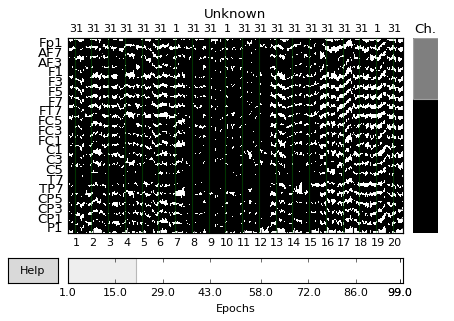

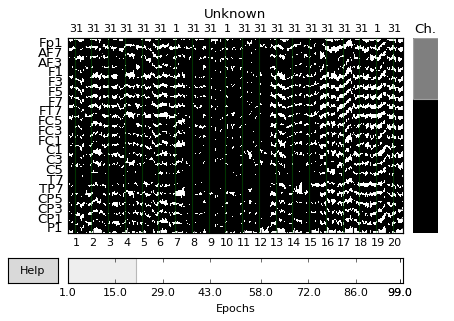

In [241]:
# Creating mne Objects from numpy arrays
import mne as mne

# sfreq = 1000  # Sampling frequency
# times = np.arange(0, 10, 0.001)  # Use 10000 samples (10s)
# eeg['srate']


# Data
# sin = np.sin(times * 10)  # Multiplied by 10 for shorter cycles
# cos = np.cos(times * 10)
# sinX2 = sin * 2
# cosX2 = cos * 2
# # Numpy array of size 4 X 10000.
# data = np.array([sin, cos, sinX2, cosX2])

# mat = loadmat(mne.datasets.misc.data_path() + '/ecog/sample_ecog.mat')
# ch_names = mat['ch_names'].tolist()
# elec = mat['elec']
# dig_ch_pos = dict(zip(ch_names, elec))
# mon = mne.channels.DigMontage(dig_ch_pos=dig_ch_pos)
# print('Created %s channel positions' % len(ch_names))
labels = []
XYZs = []
for each in eeg['chanlocs']:
    label = _todict(matobj=each)['labels']
    labels.append(label)
    X = _todict(matobj=each)['X']
    Y = _todict(matobj=each)['Y']
    Z = _todict(matobj=each)['Z']
    XYZs.append(np.array([X, Y, Z], dtype=float))
    
# len(labels)
XYZs = np.array(XYZs, dtype=float)
XYZs
ch_names = labels #mat['ch_names'].tolist()
elec = XYZs #mat['elec']
dig_ch_pos = dict(zip(ch_names, elec))
mon = mne.channels.DigMontage(dig_ch_pos=dig_ch_pos)
# mon

# # # # Definition of channel types and names.
# # # ch_types = ['mag', 'mag', 'grad', 'grad']
# # # ch_names = ['sin', 'cos', 'sinX2', 'cosX2']
# # len(eeg['chanlocs']) # number of channels for channel locations
# _todict(eeg['chanlocs'][0]), 
# _todict(eeg['chanlocs'][1])

# It is also possible to use info from another raw object.
# info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info = mne.create_info(ch_names=ch_names, ch_types='eeg', montage=mon, sfreq=eeg['srate'])
# info

# raw = mne.io.RawArray(data, info)
# mne.io.RawArray(data=, first_samp=, info=, verbose=)
data = eeg['data'].transpose(2, 0, 1)
data.shape 
# data : array, shape (n_epochs, n_channels, n_times)

# data
# # mne.io.RawArray(data=data, info=info)
# EpochArray
# EvockedArray which is the average epoch array
# mne.EpochsArray(baseline=, data=, event_id=, events=, tmin=, verbose= 
#                 flat=, info=, on_missing=, proj=, 
#                 reject=, reject_tmax=, reject_tmin=)
# eeg['event']
epochs = mne.EpochsArray(data=data, events=events, event_id=events_id, info=info, tmin=eeg['xmin'])
# epochs = mne.EpochsArray(data=data, info=info, tmin=eeg['xmin'])
picks = mne.pick_types(info, meg=False, eeg=True, misc=False)
epochs.plot(picks=picks, scalings='auto', show=True, block=True)
# epochs.plot_drop_log()
# epochs.plot_image()
# epochs.plot()
# epochs.plot_projs_topomap()
# epochs.plot_psd()
# epochs.plot_psd_topomap()
# epochs.plot_sensors()
# epochs.plot_topo_image()

# evoked.plot_topomap()
# evoked.animate_topomap()
# epochs.plot_projs_topomap(axes=, ch_type=, layout=)
# # Scaling of the figure.
# # For actual EEG/MEG data different scaling factors should be used.
# scalings = {'mag': 2, 'grad': 2}

# raw.plot(n_channels=4, scalings=scalings, title='Data from arrays',
#          show=True, block=True)

# # It is also possible to auto-compute scalings
# scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
# raw.plot(n_channels=4, scalings=scalings, title='Auto-scaled Data from arrays',
#          show=True, block=True)

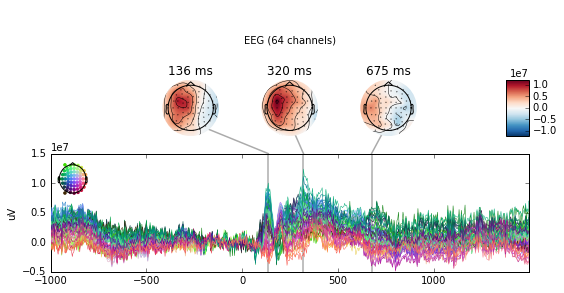

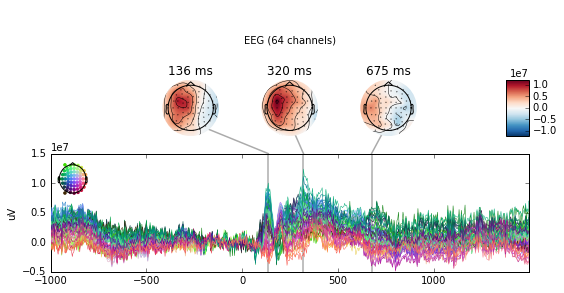

In [242]:
evoked = epochs.average()
# evoked.plot()
# evoked.plot_field()
# evoked.plot_image()
evoked.plot_joint()

In [178]:
# if len(np.unique(events[:, 0])) != len(events):
#     print('wrong')
np.unique(events[:, 0]), len(np.unique(events[:, 0])), len(events)


(array([-255, -254, -251, -250, -248, -246, -244, -242, -241, -240, -239,
        -238, -236, -235, -234, -232, -231, -230, -229, -226, -225, -224,
        -223, -222, -220, -219, -218, -217, -213, -211, -209, -208, -206,
        -203, -198, -197, -196, -191, -189, -188, -187, -183, -181,    0]),
 44,
 99)

In [6]:
# Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis.
% ls

.ipynb_checkpoints/             plot_decoding_csp_space.ipynb
Channel Description.txt*        plot_objects_from_arrays.ipynb
HW1.pdf                         sampleEEGdata.mat*
bci-hw1.ipynb                   topoplot.m*
eloc64C2.txt*


# 1-

In [8]:
# a) Extract epochs from 0 to 800 ms.
eeg.keys(), eeg['epoch'].shape, eeg['epochdescription'], eeg['trials'], _todict(matobj=eeg['epoch'][0])
eeg['data'].shape, eeg.keys(), eeg['times'].shape, eeg['srate'], eeg['times'].shape
# eeg['srate'] * 800

# Compute the ERPs at each electrode. 

# Get the average over all the trials. 

# Select nine time points at which to show topographical plots (e.g., 0 to 800 ms in 100- ms steps). 

# In one figure, make a series of topographical plots at these time points. 

# To increase the signal-to-noise ratio (SNR), make each plot show the average of activity from 20 ms before 
# until 20 ms after each time point. 

# For example, the topographical plot from 200 ms should show average activity from 180 ms until 220 ms. 

# Indicate the center time point in a title on each subplot.

((64, 640, 99),
 dict_keys(['xmax', 'times', 'spedata', 'chanlocs', 'subject', 'saved', 'condition', 'icawinv', 'icachansind', 'icasphere', 'pnts', 'icasplinefile', 'eventdescription', 'srate', 'epoch', 'dipfit', 'ref', 'history', 'filename', 'event', 'urchanlocs', 'specdata', 'comments', 'reject', 'splinefile', 'session', 'urevent', 'setname', 'nbchan', 'trials', 'etc', 'chaninfo', 'data', 'epochdescription', 'stats', 'icaweights', 'xmin', 'specicaact', 'group', 'icaact', 'filepath']),
 (640,),
 256,
 (640,))

In [ ]:
# b) Loop through each electrode and find the peak time of the ERP between 100 and 800 ms.

# Store these peak times in a separate variable and then make a topographical plot of the peak times
# (that is, the topographical map will illustrate times in milliseconds, not activity at peak times).

# Include a color bar in the figure and make sure to show times in milliseconds from time 0 (not, for
# example, time indices instead of milliseconds).

# What areas of the scalp show the earliest and the latest peak responses to the stimulus within this window?

In [133]:
# c) Repeat step (a) by applying large Laplacian filter.

# Compare step (c) with step (a) and clearly explain your observations and comments (hint: To obtain the distance
# and the surrounding electrodes, transfer the polar coordinates in eloc64C2.txt file into Cartesian.
                                                                                   
# Then for each electrode of interest keep those electrodes that are in radius [0.18 0.28], 
# remove the rest, continue obtaining your weights, and then the Laplacian filtered signal). 

In [ ]:
# (Note: Make the colormaps in ‘jet’ format and keep the color limit for all the topoplots and for
# each section the same).

# 2-

In [134]:
# a) Create a family of complex Morlet wavelets, ranging in frequencies from 2 Hz to 30 Hz in five steps. 
# Consider cycle as a fix number of 4 cycle.

In [ ]:
# b) Convolve each wavelet with EEG data from all electrodes and from only first trial 
# (hint: you can get the fft of both data and wavelet; multiply in the frequency domain, 
#  get ifft to return it back to the time domain, 
#  and then in order to make the convolved data the same length as the original data cut out the begging 
#  and the end of the convolved data with the cutting length equivalent to half of the wavelet length). 

In [ ]:
# c) Extract power and phase from the result of the complex wavelet convolution and store in a
# time x frequency x electrodes x power/phase matrix (thus, a 640 x 5 x 64 x 2 matrix).

In [135]:
# d) Make topographical plots of power and phase at 180 ms at all frequencies (hint: you may need
# to use the squeeze function to remove singleton dimensions).

# Arrange the plots in one figure with five columns for frequency and two rows for power/phase. 

# Put labels in the plot so it is clear which topographical maps correspond to which frequencies.

In [ ]:
# e) Repeat step (d) for activity at 360 ms, and 650 ms.

In [136]:
# f) Are there any prominent topographical features in power or in phase? 

# Do these differ for different frequencies? 

# Do power and phase have similar topographical distributions? 

# Is there any reason to suspect that they might have similar or different topographies?

In [ ]:
# g) (Optional) Now consider the frequency range varies between 2Hz to 30Hz in two steps.

# Instead of constant cycle equivalent to 4 (what we had before), 
# consider variable cycles ranging between [3 10] cycle. 

# Based on your total number of frequencies, 
# you can define constant steps for your cycles where it starts from 3 cycles and ends at 10 cycles. 

# 3 would correspond to the minimum frequency (i.e. 2 Hz) and 10 would correspond to the maximum frequency (i.e. 30 Hz).

# Considering only channel ‘FCz’, for each frequency, obtain the power for all the trials (i.e. 99).

# Get the average of the powers over all the trials. 

# Apply baseline correction by dividing the obtained results to the average baseline power (i.e. [-500 -200 ms]). 

# The resulting matrix size would be 20 x 640. 

# Plot the time-frequency map where the x-axis is the time [-200 1000 ms], 
# y-axis is the frequency [2 30 Hz], and color corresponds to 10log10 (power). 

# Make the colormaps in ‘jet’ format and the color-limit to [-3 3]. 

# Repeat the same process with fixed cycle 4 for all the frequencies.

# Compare your results between two conditions of fixed and variable cycles and explain your observations. 